In [2]:
#!pip install xgboost

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale,minmax_scale,robust_scale
#%matplotlib inline background 그래프 실행 및 결과 확인
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
#예측
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
#평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
#모델 성능 평가
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score,roc_curve,auc,precision_score,recall_score
#confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import recall_score, f1_score,precision_score,roc_curve,auc
from xgboost import XGBClassifier as xgb
#Scale 변환:평균,표준편차 기준
from sklearn.preprocessing import StandardScaler
#주성분 분석
from sklearn.decomposition import PCA
#회귀분석
import statsmodels.api as sm
#RMSE:root mean squared error 함수
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))
#MAPE:mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
#분류 : KNN
from sklearn.neighbors import KNeighborsClassifier
#로지스틱 회귀
from statsmodels.api import Logit
#데이터 분항
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from IPython.core.display import display, HTML
# 추검정 및 통계 분석 패키지
from scipy import stats
from scipy.stats import shapiro
import scipy.stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from sklearn.linear_model import LinearRegression
display(HTML("<style>.container { width:100% !important; }</style>"))

from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.api import Logit

matplotlib.rc('font',family='NanumBarunGothic')
matplotlib.rc('axes', unicode_minus=False)

In [4]:
# 학습데이터 검증데이터 분할 
from sklearn.model_selection import train_test_split

# 파이프라인 
from imblearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

# 결측치처리 + 인코딩 / 스케일링 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# 불균형 데이터 처리
from imblearn.over_sampling import SMOTE

# 학습 
from sklearn.tree import DecisionTreeClassifier

# 교차검증 + 하이퍼 파라미터튜닝 
from sklearn.model_selection import GridSearchCV



In [5]:
#정균아 여기 파일 밥 소스 오픈하고

df_raw = pd.read_csv('/home/piai/다운로드/교수님파일_소스_분리.csv')
df_raw.isnull().sum()

df_raw['불량유무'] = 1
df_raw.isnull().sum()

null = df_raw[df_raw['오류조치시간'].isnull() == True].index

df_raw.loc[null,'불량유무'] = 0


In [6]:
df_raw['Target'].value_counts()

0.0    13219
1.0      671
Name: Target, dtype: int64

In [7]:
df_raw['불량유무'].value_counts()

0    13219
1      671
Name: 불량유무, dtype: int64

In [8]:
df_raw[df_raw['불량유무'] ==1]

,Unnamed: 0.1,Unnamed: 0,순번,생산라인코드,생산라인명,품목코드,품목명,작업장코드,충전실온도,실링온도,...,ID,발생시간,종료시간,오류조치시간,비가동코드,Error_Message,오류발생작업장명,Target,구분,불량유무
10,10,10,10,D004,PET병,13D02080,참깨흑임자드레싱,W005,71.125831,93.425831,...,2021-01-0313D02080D00410,14:16,14:24,8.0,W0056B4,위치조정실패,충전실,1.0,ect,1
43,43,43,7,D011,2동 오리히로,16A01016,시아스고구마샐러드믹스,W005,71.587470,103.987470,...,2021-01-0416A01016D0117,18:54,19:03,9.0,W005711,대기,충전실,1.0,ect,1
47,47,47,2,C002,쿠커 #2,23K01321,나가사키베이스(재),W003,70.540995,102.440995,...,2021-01-0523K01321C0022,9:51,9:58,7.0,W003452,충진 오류,쿠킹실,1.0,ect,1
71,71,71,13,P004,PET#1,13R02051,이마트베스트돈까스소스,W007,71.401189,111.901189,...,2021-01-0513R02051P00413,18:20,20:44,144.0,W0076B2,구동부,포장실,1.0,ect,1
125,125,125,17,C004,쿠커 #4,23D02080,참깨흑임자드레싱(재),W003,70.649333,105.149333,...,2021-01-1023D02080C00417,22:32,1:16,164.0,W003721,충진 오류,쿠킹실,1.0,ect,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13847,24017,24017,2,D003,로타리 #2,13A00701,마왕소스(순한맛),W005,69.817821,100.017821,...,2021-10-1413A00701D0032,10:34,10:47,13.0,W005A11,기타,충전실,1.0,ect,1
13872,24056,24056,2,D0036,로타리 #5,16B06061,천년풍미퓨어마요네즈1kg,W005,71.865935,105.165935,...,2021-10-2216B06061D00362,12:30,18:34,364.0,W005712,공정 과부하,충전실,1.0,ect,1
13873,24057,24057,3,D084,2동 로타리#4,13A00725,샘표강된장양념,W005,71.671267,112.571266,...,2021-10-2513A00725D0843,9:46,11:49,123.0,W005713,수리,충전실,1.0,ect,1
13875,24059,24059,1,C045,쿠커 #5,23U02003,유기아가베시럽665g/올가홀(재),W003,69.827929,86.927929,...,2021-10-2523U02003C0451,8:58,9:04,6.0,W003446,산도(ph) 이상,쿠킹실,1.0,ect,1


In [9]:
# x변수명 밥기준 소스기준 나눠서 작성

In [10]:
X = df_raw[['쿠킹스팀압력', '실링압력', '충전실온도','쿠킹온도']]
Y = df_raw['불량유무']

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y , random_state=1234,  test_size = 0.3)

In [12]:
# 문자 / 숫자 파이프 구성 
numeric_pipe = make_pipeline( SimpleImputer() , MinMaxScaler() )
category_pipe = make_pipeline( SimpleImputer(strategy='most_frequent') , OneHotEncoder())


# 숫자와 문자를 구분하는 리스트
numeric_list = X.describe().columns.tolist()
# category_list = X.describe(include='object').columns.tolist()


preprocess_pipe = make_column_transformer((numeric_pipe, numeric_list))
model_pipe = make_pipeline(preprocess_pipe, SMOTE(), RandomForestClassifier(random_state=1234))



model_pipe.fit(X_train, Y_train)


grid_model = GridSearchCV(model_pipe , param_grid = {}, cv=4)
grid_model.fit(X_train,Y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['쿠킹스팀압력',
                                                                          '실링압력',
                                                                          '충전실온도',
                                                                          '쿠킹온도'])])),
                                       ('smote', SMOTE()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=1234))]),
             param_grid={})

In [13]:
rf_best_model =grid_model

In [14]:
# 문자 / 숫자 파이프 구성 
numeric_pipe = make_pipeline( SimpleImputer() , MinMaxScaler() )
category_pipe = make_pipeline( SimpleImputer(strategy='most_frequent') , OneHotEncoder())


# 숫자와 문자를 구분하는 리스트
numeric_list = X.describe().columns.tolist()
# category_list = X.describe(include='object').columns.tolist()


preprocess_pipe = make_column_transformer((numeric_pipe, numeric_list))
model_pipe = make_pipeline(preprocess_pipe, SMOTE(), GradientBoostingClassifier(random_state=1234))



model_pipe.fit(X_train, Y_train)


grid_model = GridSearchCV(model_pipe , param_grid = {}, cv=4)
grid_model.fit(X_train,Y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['쿠킹스팀압력',
                                                                          '실링압력',
                                                                          '충전실온도',
                                                                          '쿠킹온도'])])),
                                       ('smote', SMOTE()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(random_state=1234))]),
             param_grid={})

In [15]:
gf_best_model = grid_model.best_estimator_

In [16]:
# 문자 / 숫자 파이프 구성 
numeric_pipe = make_pipeline( SimpleImputer() , MinMaxScaler() )
category_pipe = make_pipeline( SimpleImputer(strategy='most_frequent') , OneHotEncoder())


# 숫자와 문자를 구분하는 리스트
numeric_list = X.describe().columns.tolist()
# category_list = X.describe(include='object').columns.tolist()

preprocess_pipe = make_column_transformer((numeric_pipe, numeric_list))
model_pipe = make_pipeline(preprocess_pipe, SMOTE(), xgb(random_state=1234))



grid_model = GridSearchCV(model_pipe , param_grid={}, cv=4)




In [17]:
grid_model.fit(X_train,Y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['쿠킹스팀압력',
                                                                          '실링압력',
                                                                          '충전실온도',
                                                                          '쿠킹온도'])])),
                                       ('smote', SMOTE()),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      cols...
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=1234, ...))]),
             param_grid={})

In [18]:
xgb_best_model =grid_model.best_estimator_

In [19]:
# 문자 / 숫자 파이프 구성 
numeric_pipe = make_pipeline( SimpleImputer() , MinMaxScaler() )
category_pipe = make_pipeline( SimpleImputer(strategy='most_frequent') , OneHotEncoder())





# 숫자와 문자를 구분하는 리스트
numeric_list = X.describe().columns.tolist()
# category_list = X.describe(include='object').columns.tolist()

preprocess_pipe = make_column_transformer((numeric_pipe, numeric_list))
model_pipe = make_pipeline(preprocess_pipe, SMOTE(), SVC(random_state=1234))



grid_model = GridSearchCV(model_pipe , param_grid ={} , cv=4)
grid_model.fit(X_train,Y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['쿠킹스팀압력',
                                                                          '실링압력',
                                                                          '충전실온도',
                                                                          '쿠킹온도'])])),
                                       ('smote', SMOTE()),
                                       ('svc', SVC(random_state=1234))]),
             param_grid={})

In [20]:
svc_best_model = grid_model.best_estimator_

In [21]:
# 문자 / 숫자 파이프 구성 
numeric_pipe = make_pipeline( SimpleImputer() , MinMaxScaler() )
category_pipe = make_pipeline( SimpleImputer(strategy='most_frequent') , OneHotEncoder())


# 숫자와 문자를 구분하는 리스트
numeric_list = X.describe().columns.tolist()
# category_list = X.describe(include='object').columns.tolist()

preprocess_pipe = make_column_transformer((numeric_pipe, numeric_list))
model_pipe = make_pipeline(preprocess_pipe, SMOTE(), DecisionTreeClassifier(random_state=1234))


model_pipe.fit(X_train, Y_train)


grid_model = GridSearchCV(model_pipe , param_grid={} , cv=4)
grid_model.fit(X_train,Y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['쿠킹스팀압력',
                                                                          '실링압력',
                                                                          '충전실온도',
                                                                          '쿠킹온도'])])),
                                       ('smote', SMOTE()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=1234))]),
             param_grid={})

In [22]:
dec_best_model = grid_model.best_estimator_

In [23]:
model = ['RandomForest', 'GB', 'XGB','SVC', 'DEC']

train_accuracy = []; test_accuracy = []
model_auc =[]

model_precision = []; model_recall = []
model_f1_score = []

In [24]:



#최종모델

train_accuracy.append(rf_best_model.score(X_train, Y_train))
test_accuracy.append(rf_best_model.score(X_test, Y_test))

y_pred = rf_best_model.predict(X_test)
fpr,tpr,thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr,tpr)

model_auc.append(roc_auc)


model_precision.append(precision_score(Y_test, y_pred))
model_recall.append(recall_score(Y_test, y_pred))

model_f1_score.append(f1_score(Y_test, y_pred))

In [25]:



#최종모델

train_accuracy.append(gf_best_model.score(X_train, Y_train))
test_accuracy.append(gf_best_model.score(X_test, Y_test))

y_pred = gf_best_model.predict(X_test)
fpr,tpr,thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr,tpr)

model_auc.append(roc_auc)


model_precision.append(precision_score(Y_test, y_pred))
model_recall.append(recall_score(Y_test, y_pred))

model_f1_score.append(f1_score(Y_test, y_pred))

In [26]:



#최종모델

train_accuracy.append(xgb_best_model.score(X_train, Y_train))
test_accuracy.append(xgb_best_model.score(X_test, Y_test))

y_pred = xgb_best_model.predict(X_test)
fpr,tpr,thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr,tpr)

model_auc.append(roc_auc)


model_precision.append(precision_score(Y_test, y_pred))
model_recall.append(recall_score(Y_test, y_pred))

model_f1_score.append(f1_score(Y_test, y_pred))

In [27]:



#최종모델

train_accuracy.append(svc_best_model.score(X_train, Y_train))
test_accuracy.append(svc_best_model.score(X_test, Y_test))

y_pred = svc_best_model.predict(X_test)
fpr,tpr,thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr,tpr)

model_auc.append(roc_auc)


model_precision.append(precision_score(Y_test, y_pred))
model_recall.append(recall_score(Y_test, y_pred))

model_f1_score.append(f1_score(Y_test, y_pred))

In [28]:



#최종모델

train_accuracy.append(dec_best_model.score(X_train, Y_train))
test_accuracy.append(dec_best_model.score(X_test, Y_test))

y_pred = dec_best_model.predict(X_test)
fpr,tpr,thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr,tpr)

model_auc.append(roc_auc)


model_precision.append(precision_score(Y_test, y_pred))
model_recall.append(recall_score(Y_test, y_pred))

model_f1_score.append(f1_score(Y_test, y_pred))

In [29]:
from sklearn.metrics import classification_report

In [30]:
Y_train_pred = dec_best_model.predict(X_train)
Y_test_pred = dec_best_model.predict(X_test)

In [31]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9271
           1       1.00      1.00      1.00       452

    accuracy                           1.00      9723
   macro avg       1.00      1.00      1.00      9723
weighted avg       1.00      1.00      1.00      9723



In [32]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3948
           1       0.80      0.96      0.87       219

    accuracy                           0.99      4167
   macro avg       0.90      0.98      0.93      4167
weighted avg       0.99      0.99      0.99      4167



In [33]:
df_eval = pd.DataFrame(index = model)
df_eval['TrainAccuracy'] = train_accuracy ; df_eval['TestAccuracy'] = test_accuracy
df_eval['AUC'] = model_auc
df_eval['Precision'] = model_precision; df_eval['Recall'] = model_recall
df_eval['F1 Score'] = model_f1_score
df_eval.round(3)

,TrainAccuracy,TestAccuracy,AUC,Precision,Recall,F1 Score
RandomForest,1.000,0.996,0.981,0.968,0.963,0.966
GB,0.997,0.994,0.962,0.962,0.927,0.944
XGB,1.000,0.992,0.978,0.890,0.963,0.925
SVC,0.986,0.983,0.952,0.791,0.918,0.850
DEC,1.000,0.985,0.975,0.799,0.963,0.874


In [34]:
df_eval['TrainAccuracy']

RandomForest    1.000000
GB              0.997120
XGB             0.999691
SVC             0.985601
DEC             1.000000
Name: TrainAccuracy, dtype: float64

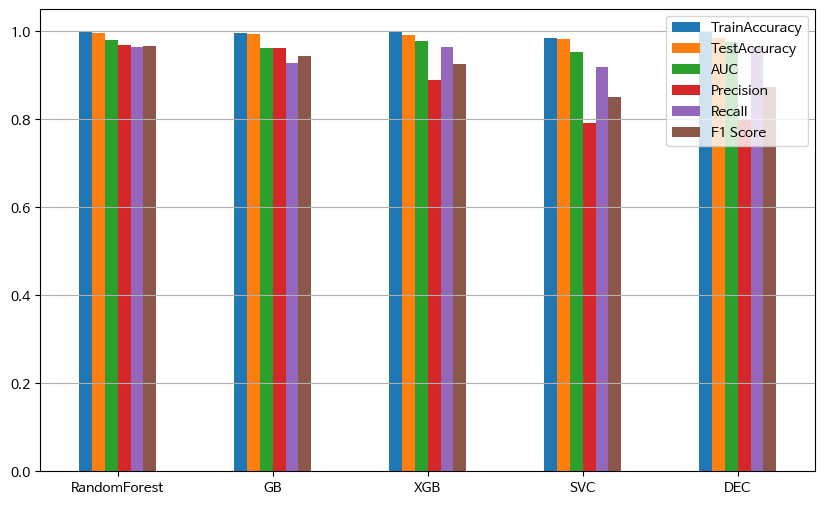

In [35]:
df_eval.plot.bar(rot =0, figsize=(10,6))
plt.legend()
plt.grid(axis = 'y')